In [2]:
import matplotlib.pyplot as plt
import mne

In [3]:
import hypyp
import hypyp.fnirs as fnirs


In [4]:
# Setup data
#file_path1 = "/home/pfortin/work/imagine/samba/imagine-data/nirs/2025-09-17/reem_005/reem_005.snirf"
#file_path2 = "/home/pfortin/work/imagine/samba/imagine-data/nirs/2025-09-17/remy_005/remy_005.snirf"
file_path1 = "/home/pfortin/work/imagine/samba/imagine-data/nirs/2025-09-17/reem_005/reem_005_config.hdr"
file_path2 = "/home/pfortin/work/imagine/samba/imagine-data/nirs/2025-09-17/remy_005/remy_005_config.hdr"

In [5]:
task = hypyp.utils.Task('check', onset_time=0, duration=60)
def get_recordings():
    return [
        fnirs.Recording(subject_label='alice', tasks=[task]).load_file(file_path1, preprocess=False),
        fnirs.Recording(subject_label='bob', tasks=[task]).load_file(file_path2, preprocess=False),
    ]



In [6]:

recordings = get_recordings()

preprocessor = fnirs.MnePreprocessorAsIs()

for recording in recordings:
    recording.preprocess(preprocessor)

    print(recording.mne_raw.info['subject_info'])





Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]
{'his_id': 'reem', 'first_name': 'reem', 'sex': 2 (FIFFV_SUBJ_SEX_FEMALE), 'birthday': (1999, 9, 17)}
Used Annotations descriptions: [np.str_('1.0'), np.str_('2.0'), np.str_('3.0')]
{'his_id': 'remy', 'first_name': 'remy', 'sex': 1 (FIFFV_SUBJ_SEX_MALE), 'birthday': (1996, 9, 17)}


/home/pfortin/work/ppsp/HyPyP-synchro/hypyp/fnirs/preprocessor/implementations/mne_preprocessor_as_is.py:27: RuntimeWarning: MNE has not been tested with Aurora version 2025.2.0-19-g4d84988d
  return mne.io.read_raw_nirx(fname=path, preload=True, verbose=verbose)
/home/pfortin/work/ppsp/HyPyP-synchro/hypyp/fnirs/preprocessor/implementations/mne_preprocessor_as_is.py:27: RuntimeWarning: MNE has not been tested with Aurora version 2025.2.0-19-g4d84988d
  return mne.io.read_raw_nirx(fname=path, preload=True, verbose=verbose)


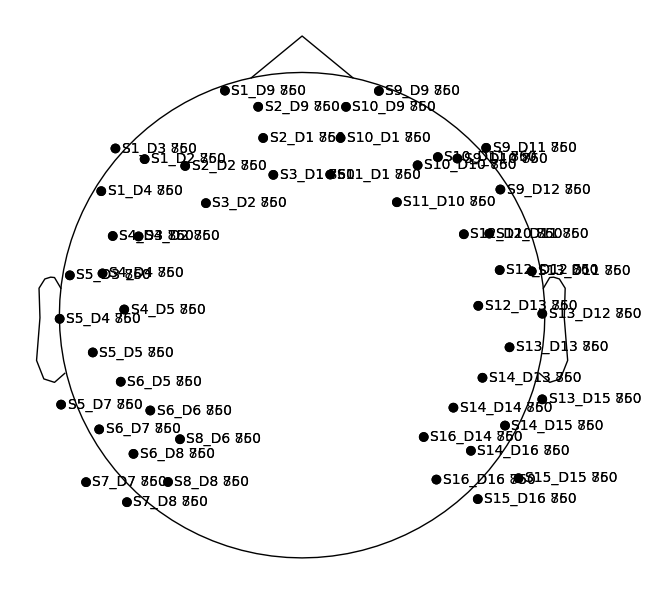

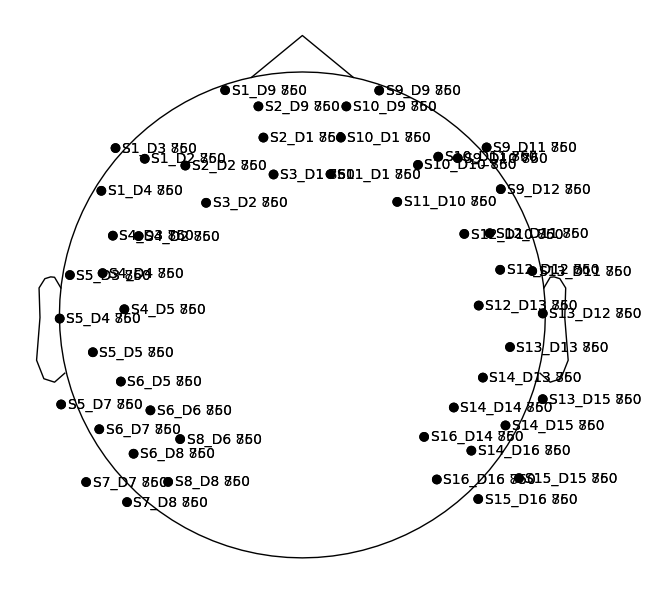

In [29]:

raw: mne.io.Raw = recordings[0].mne_raw
raw.plot_sensors(show_names=True)


In [30]:

dyad = fnirs.Dyad(*recordings)

wavelet = hypyp.wavelet.ComplexMorletWavelet(period_range=(0.5, 10))

dyad.compute_wtcs(ch_match='760', wavelet=wavelet)


S1_D2 760


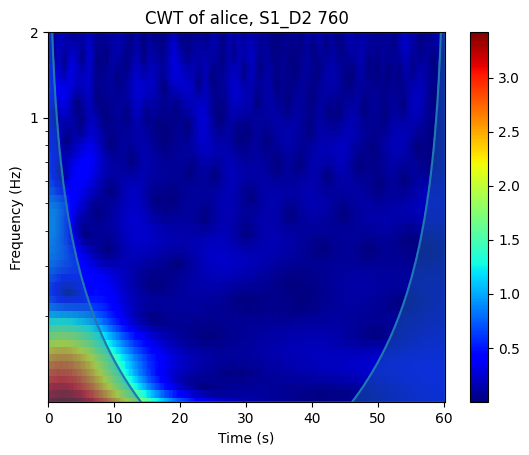

S1_D3 760


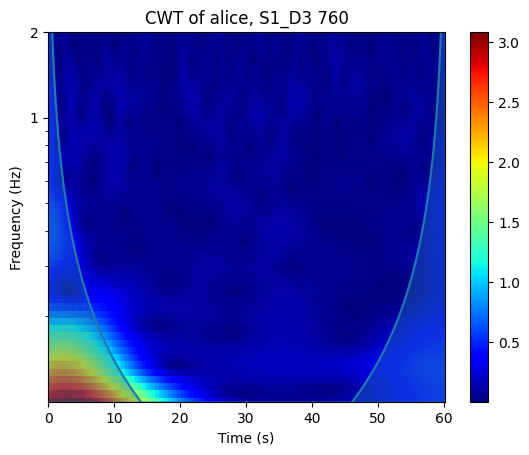

S1_D4 760


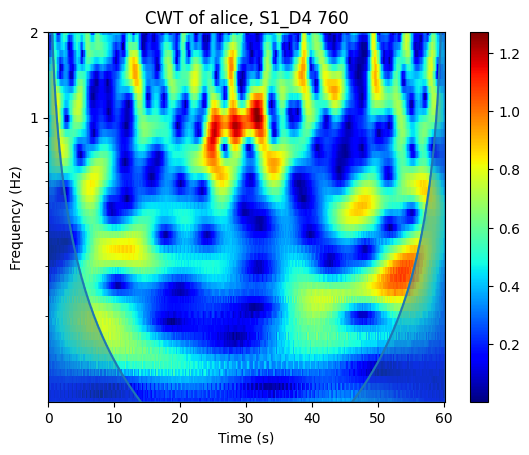

S1_D9 760


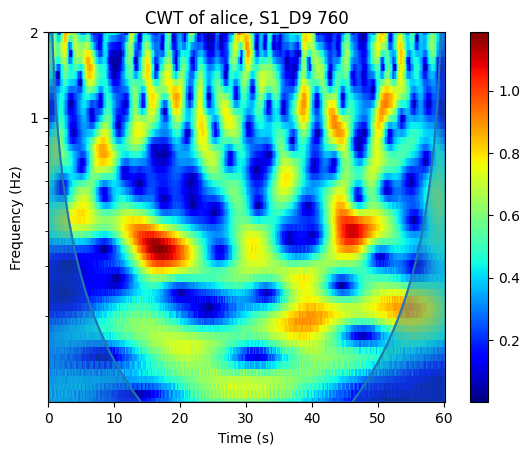

S2_D1 760


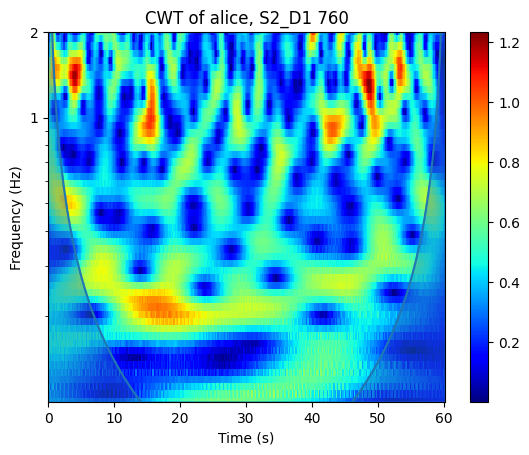

S2_D2 760


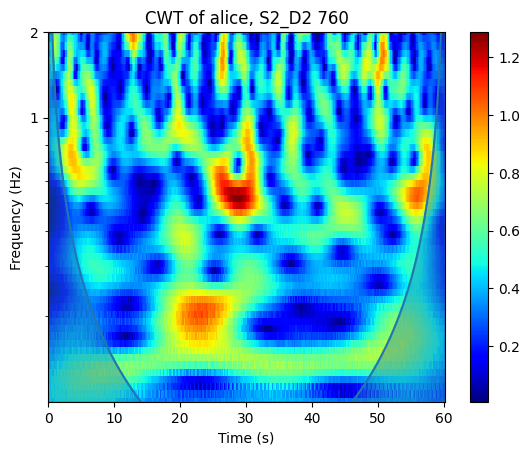

S2_D9 760


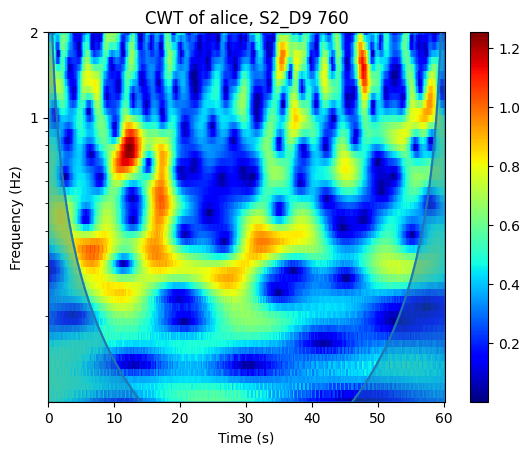

S3_D1 760


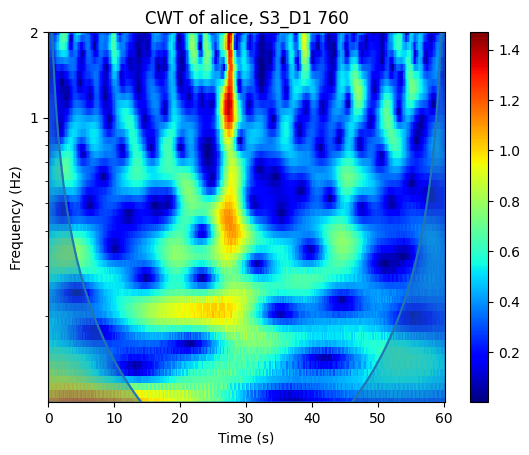

S3_D2 760


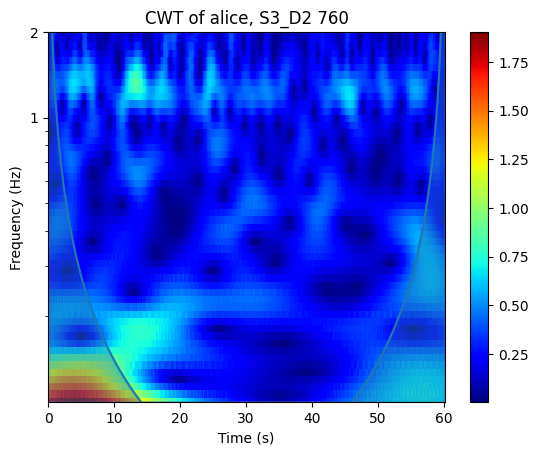

S4_D2 760


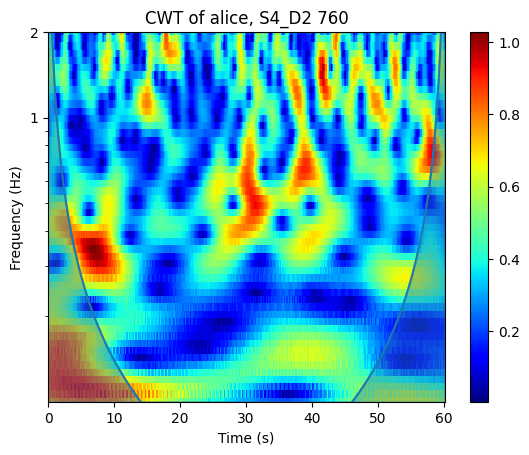

S4_D3 760


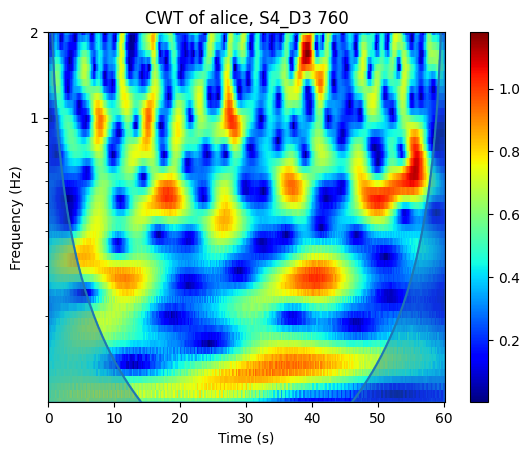

S4_D4 760


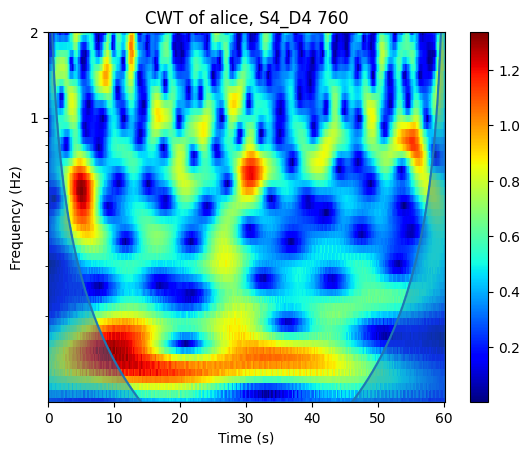

S4_D5 760


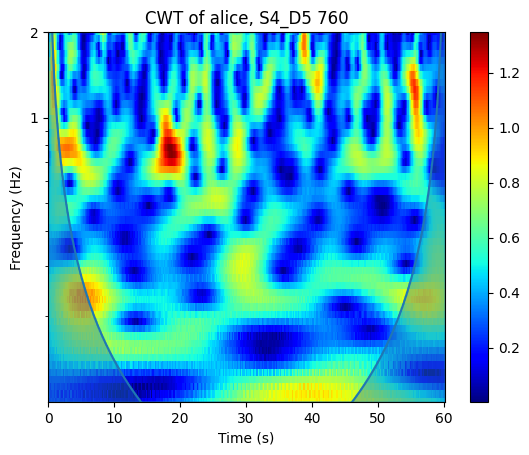

S5_D3 760


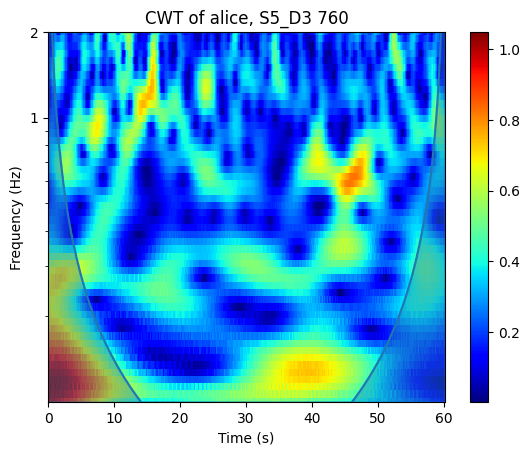

S5_D4 760


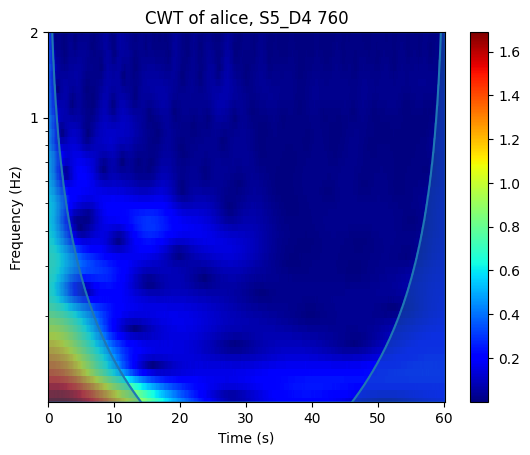

S5_D5 760


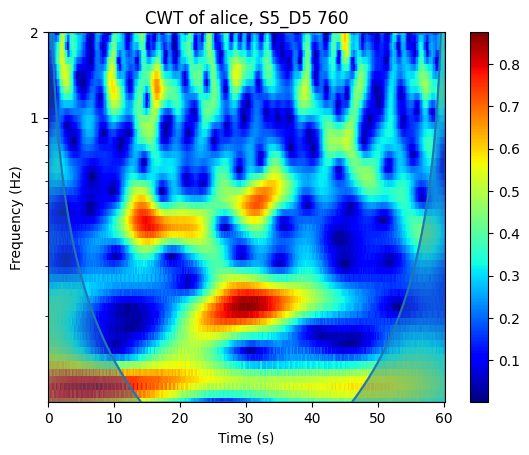

S5_D7 760


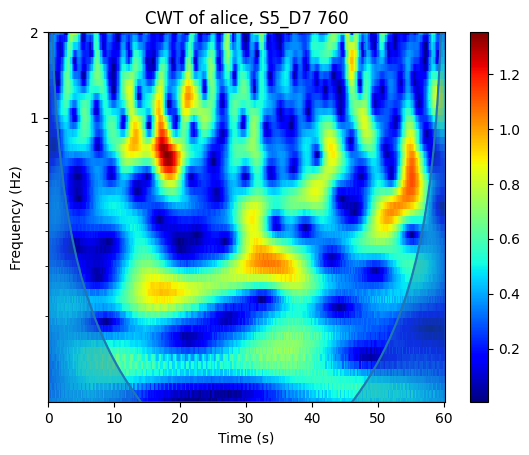

S6_D5 760


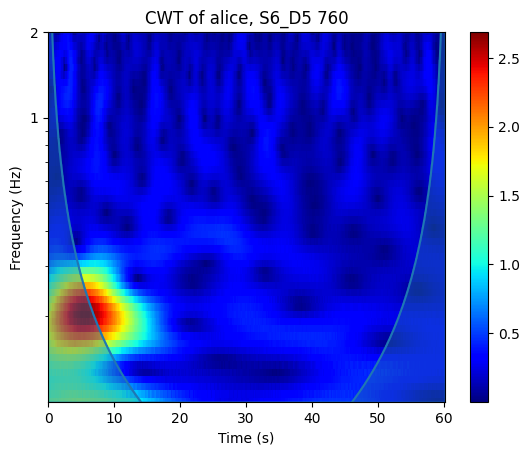

S6_D6 760


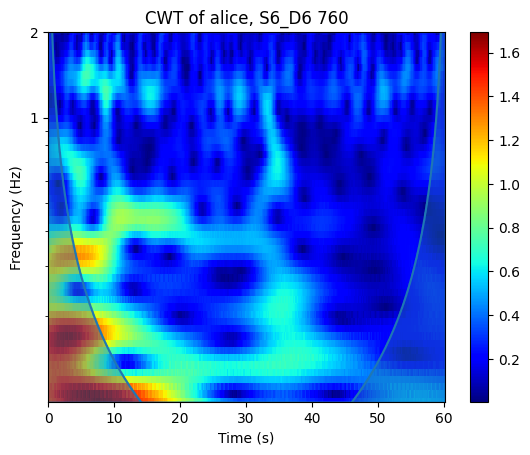

S6_D7 760


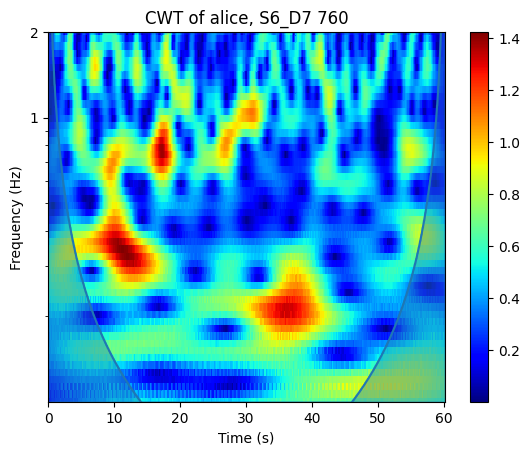

S6_D8 760


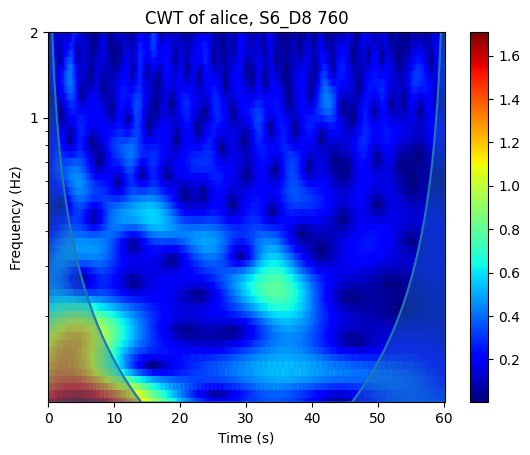

S7_D7 760


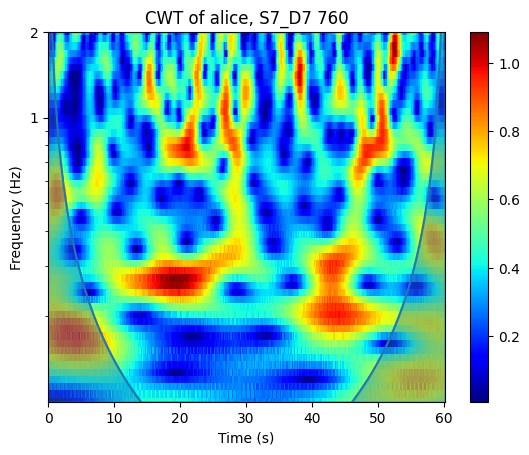

S7_D8 760


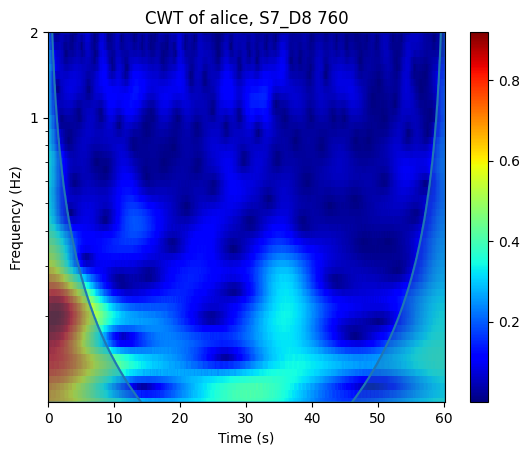

S8_D6 760


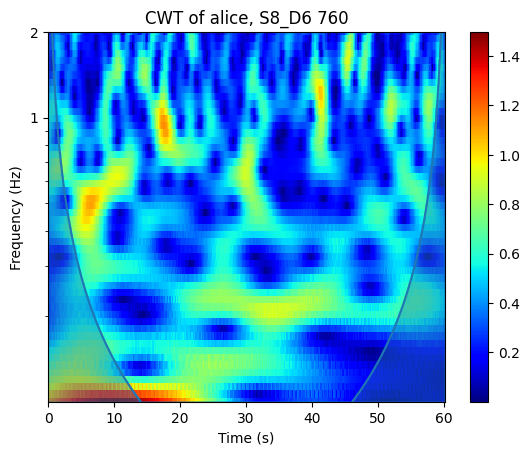

S8_D8 760


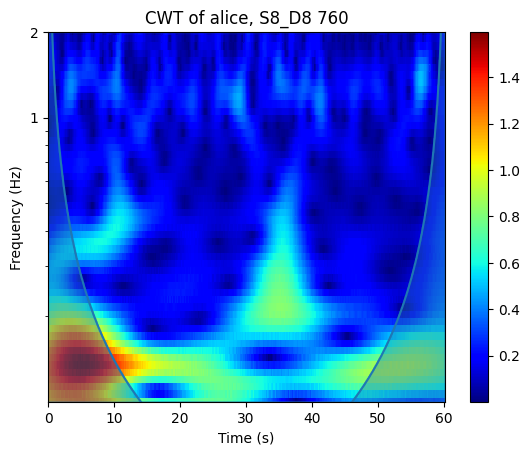

S9_D9 760


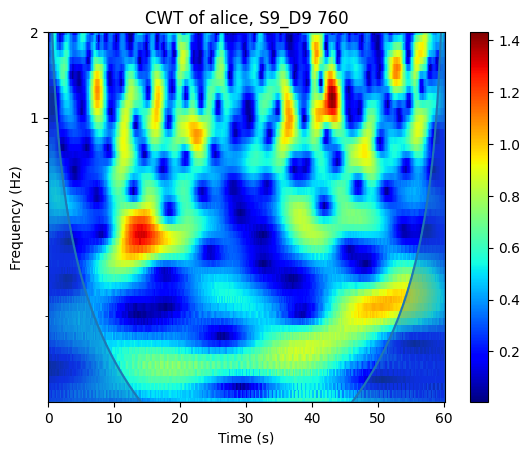

S9_D10 760


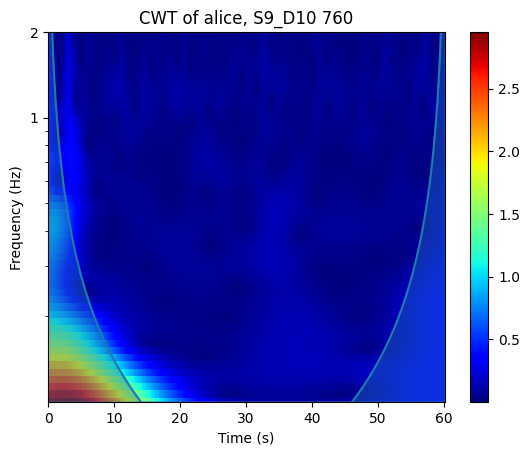

S9_D11 760


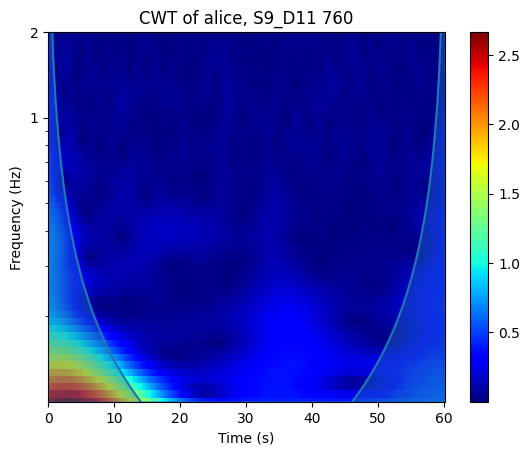

S9_D12 760


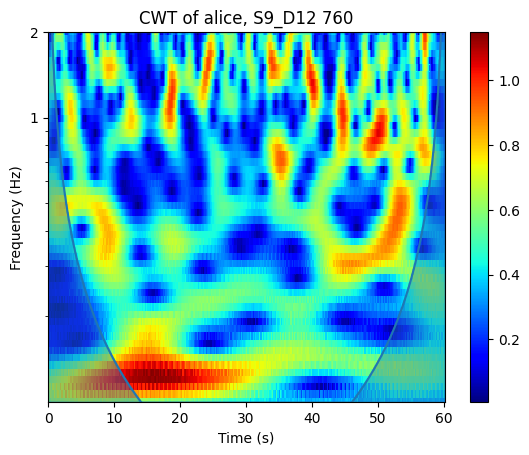

S10_D1 760


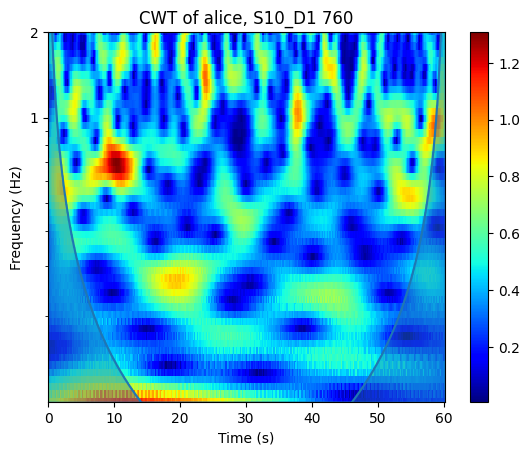

S10_D9 760


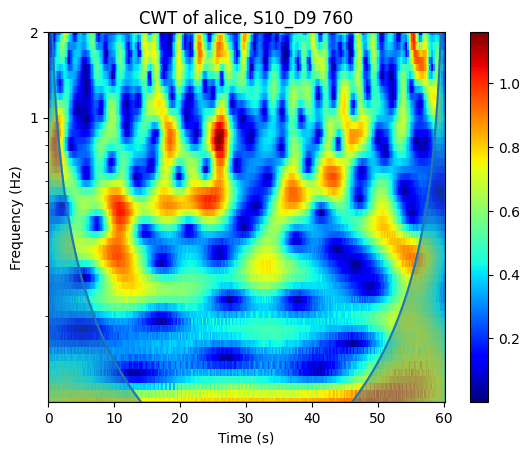

S10_D10 760


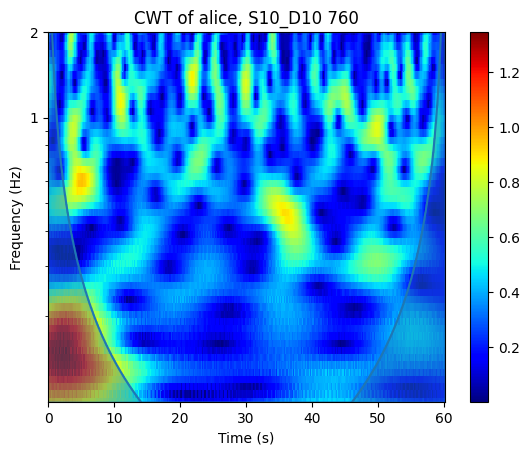

S10_D11 760


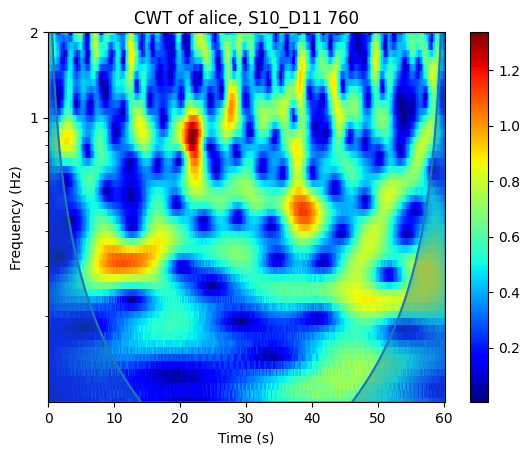

S11_D1 760


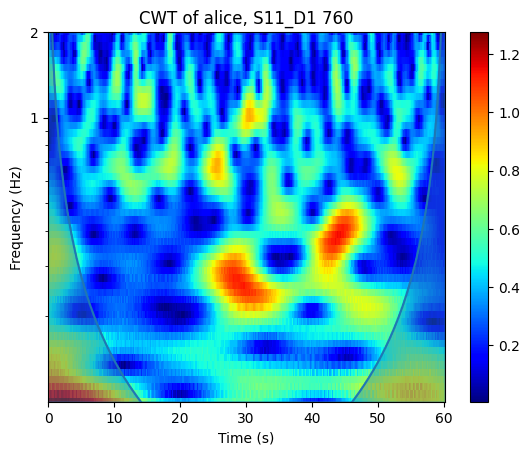

S11_D10 760


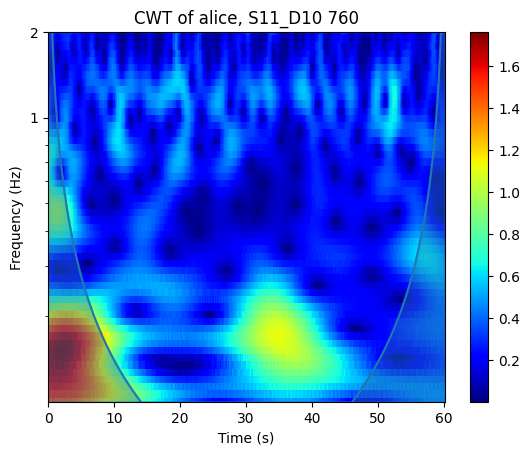

S12_D10 760


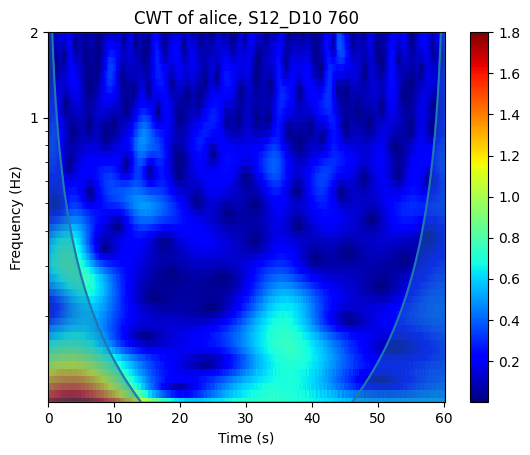

S12_D11 760


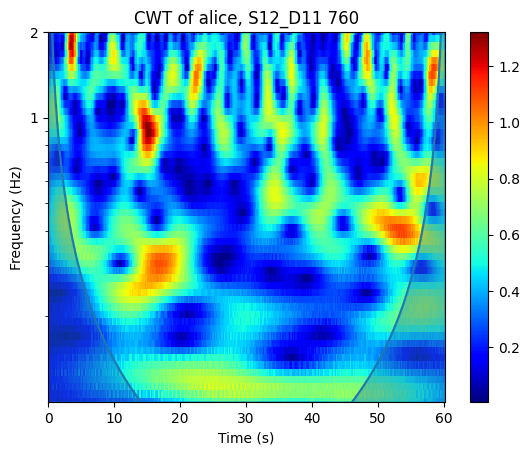

S12_D12 760


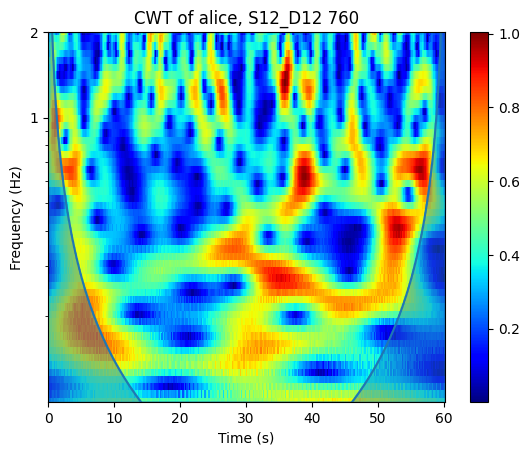

S12_D13 760


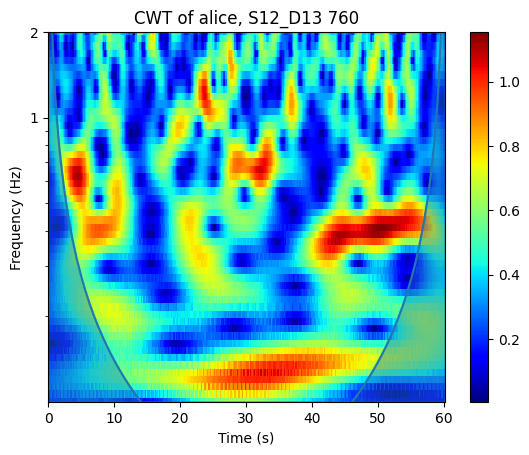

S13_D11 760


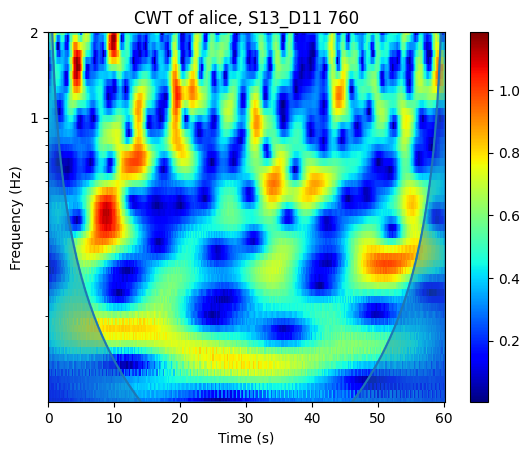

S13_D12 760


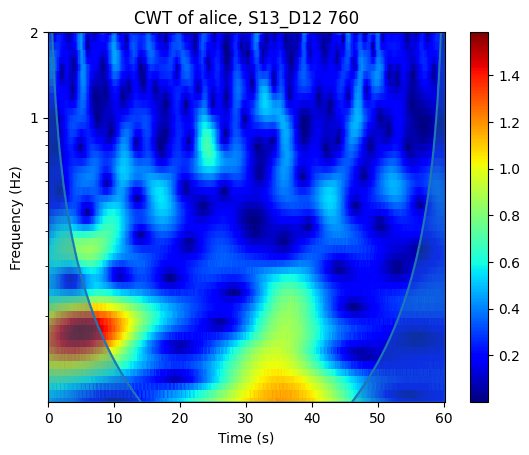

S13_D13 760


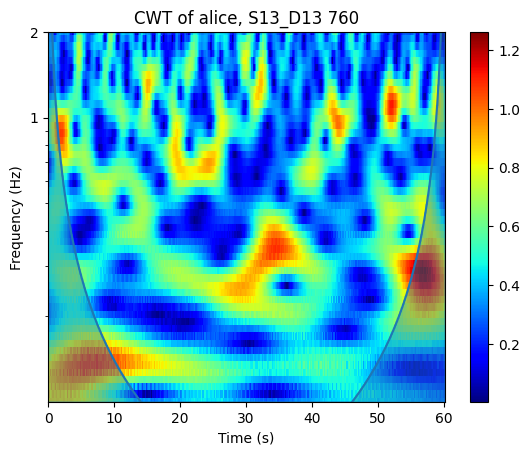

S13_D15 760


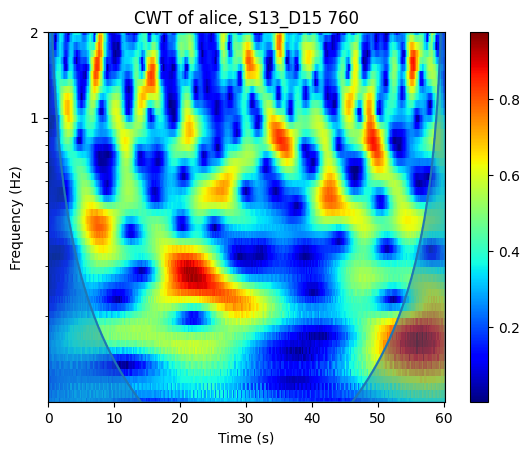

S14_D13 760


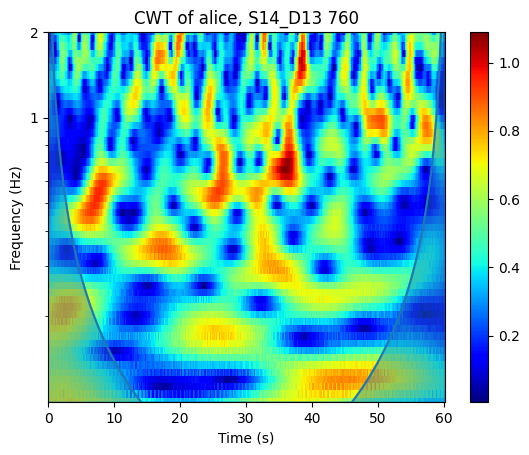

S14_D14 760


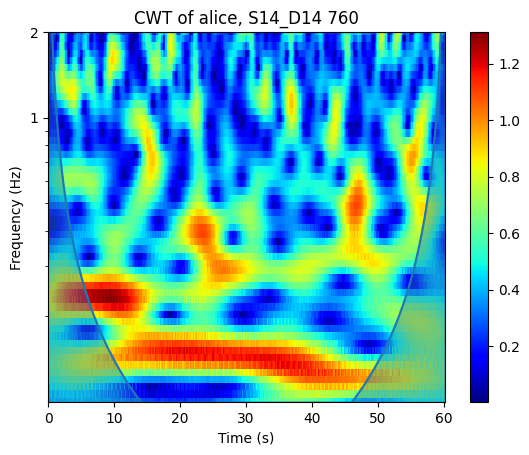

S14_D15 760


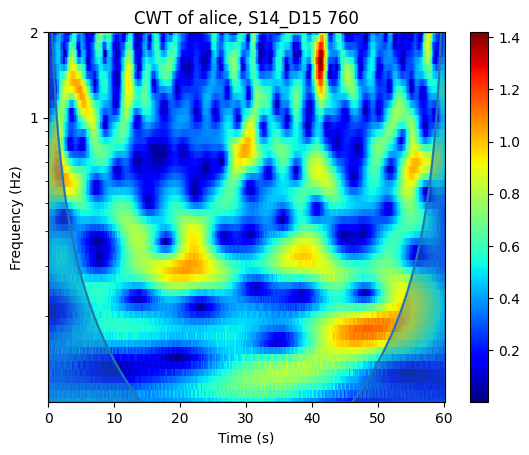

S14_D16 760


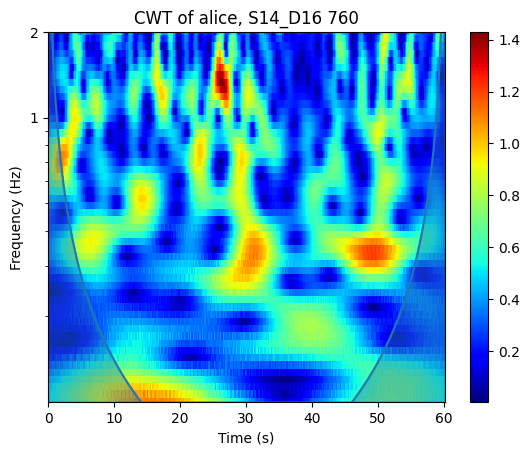

S15_D15 760


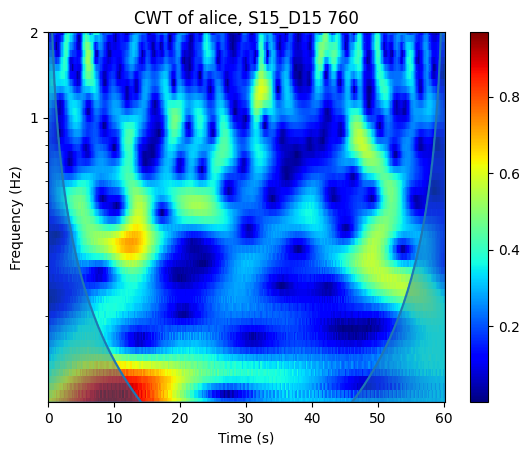

S15_D16 760


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9a53c51490>>
Traceback (most recent call last):
  File "/home/pfortin/work/ppsp/HyPyP-synchro/.venv/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 781, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


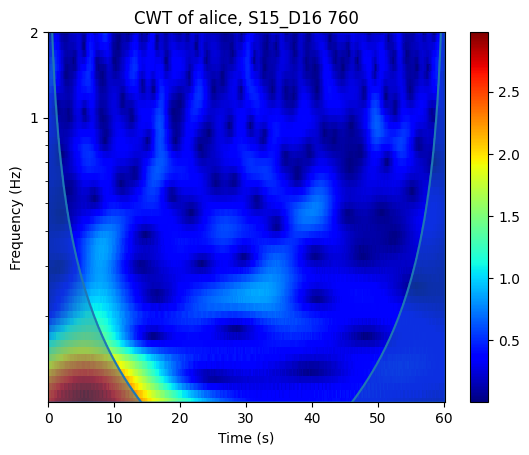

S16_D14 760


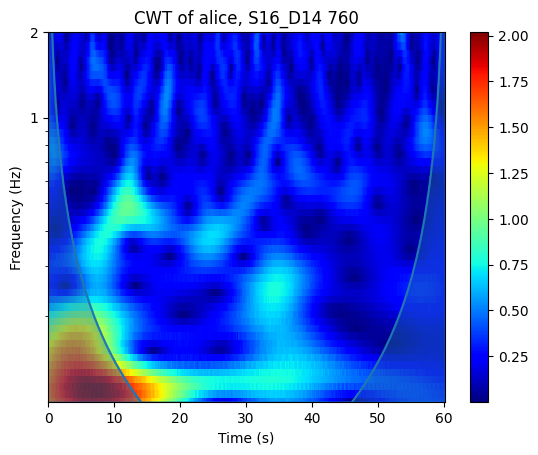

S16_D16 760


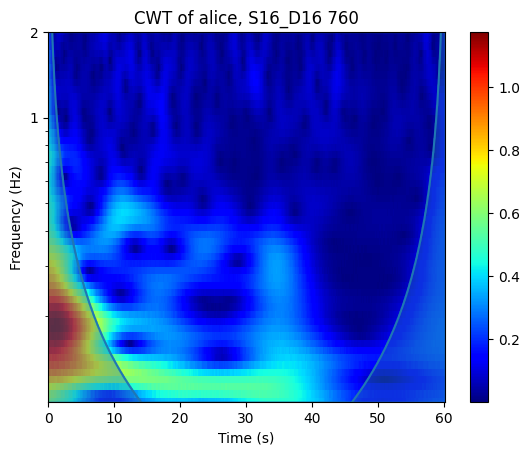

S1_D2 760


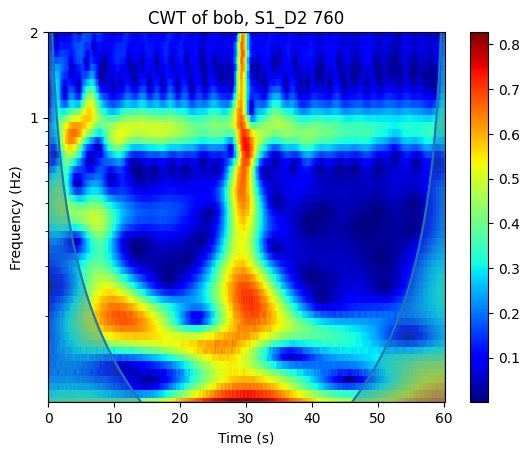

S1_D3 760


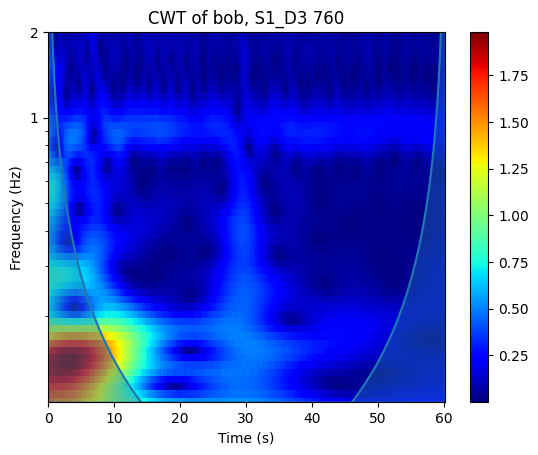

S1_D4 760


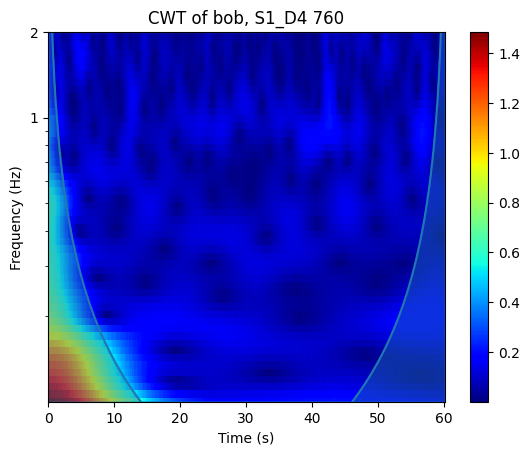

S1_D9 760


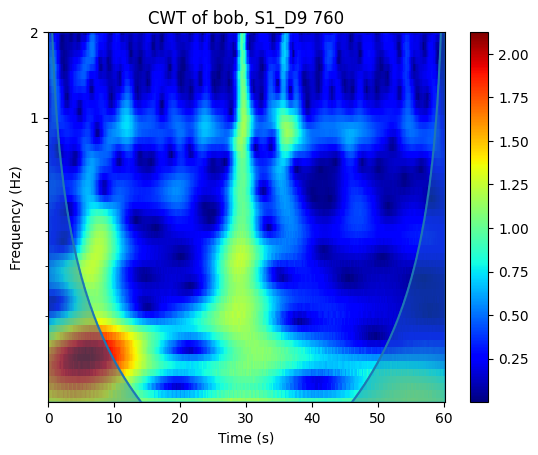

S2_D1 760


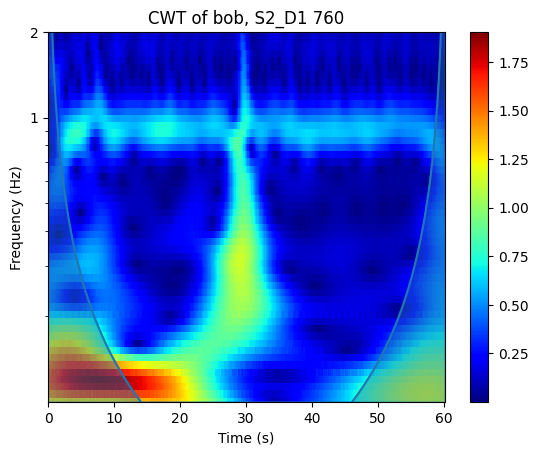

S2_D2 760


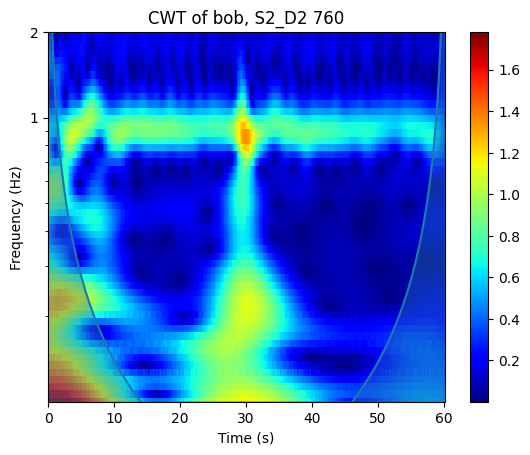

S2_D9 760


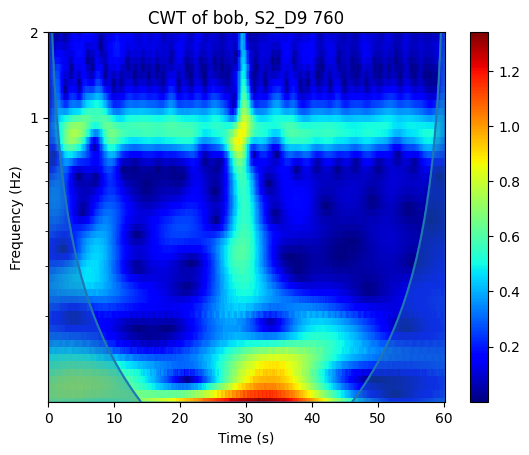

S3_D1 760


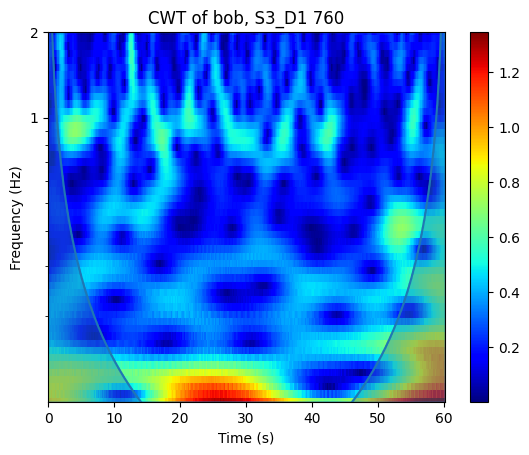

S3_D2 760


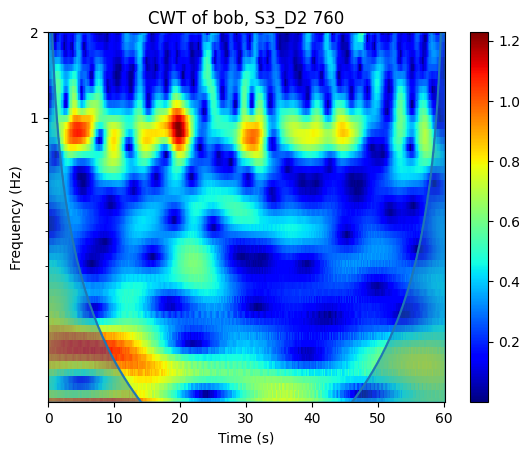

S4_D2 760


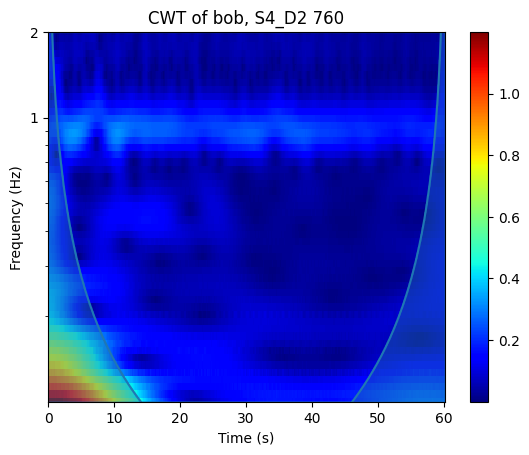

S4_D3 760


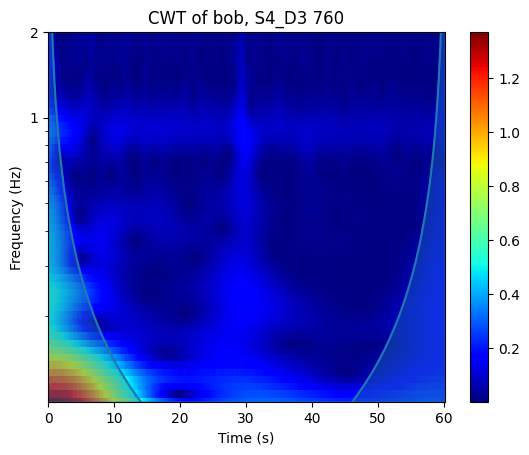

S4_D4 760


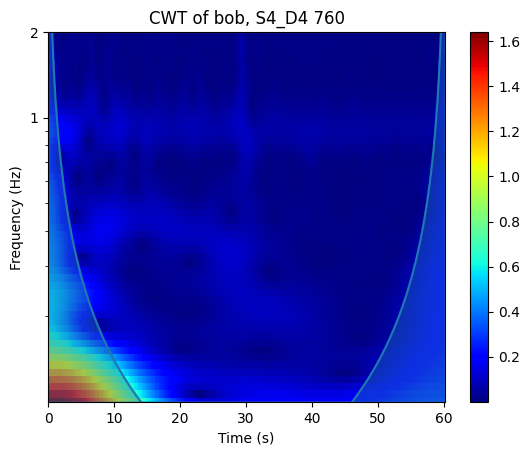

S4_D5 760


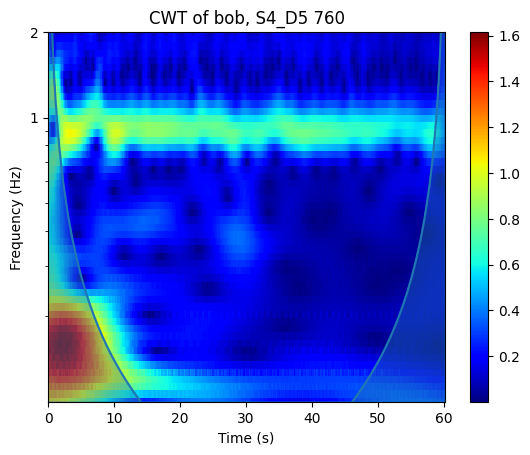

S5_D3 760


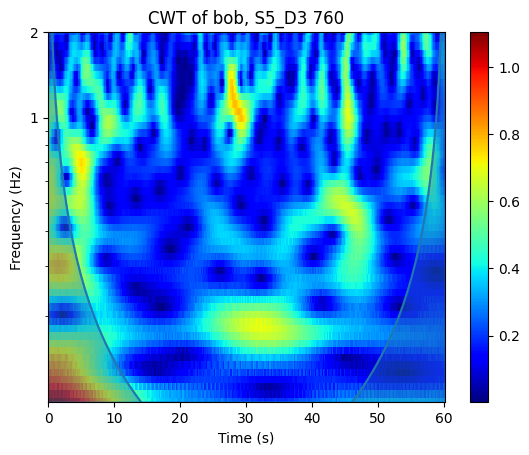

S5_D4 760


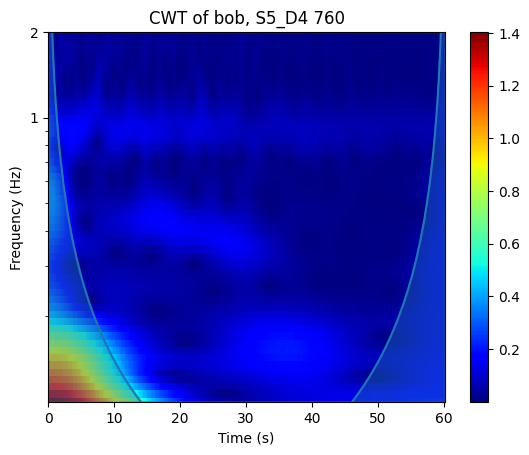

S5_D5 760


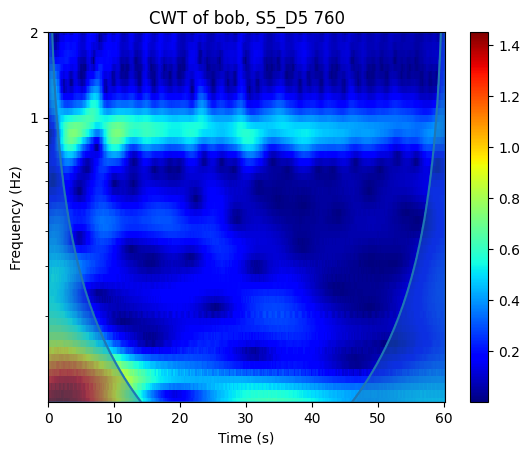

S5_D7 760


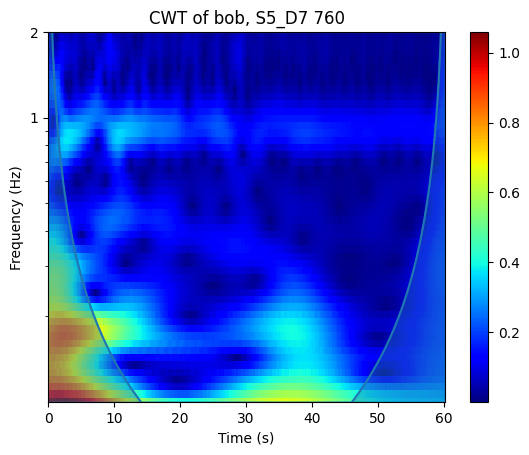

S6_D5 760


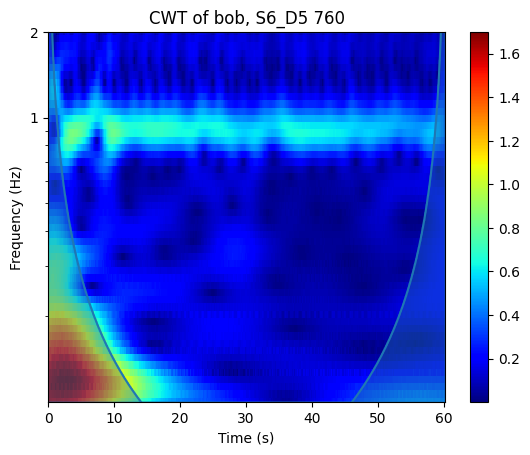

S6_D6 760


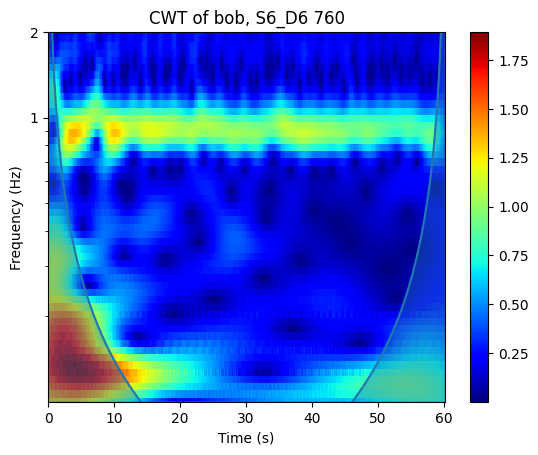

S6_D7 760


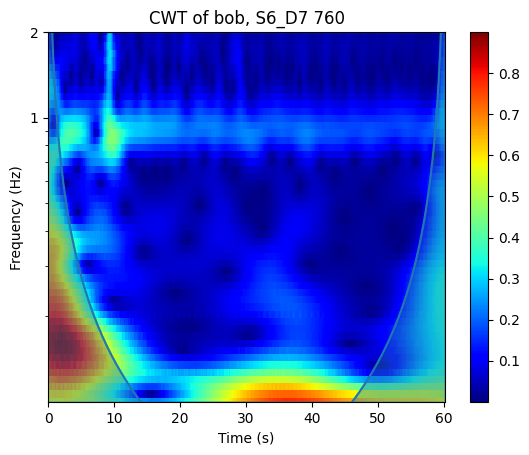

S6_D8 760


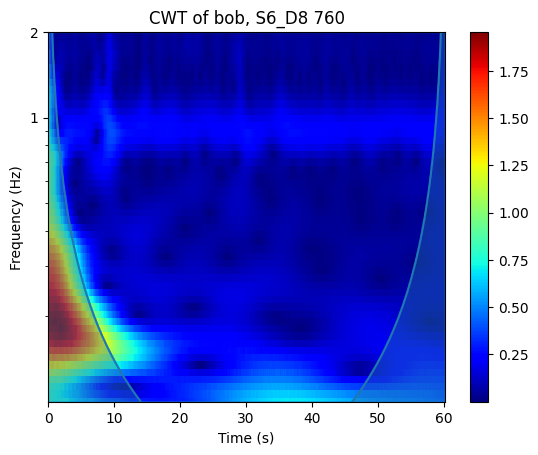

S7_D7 760


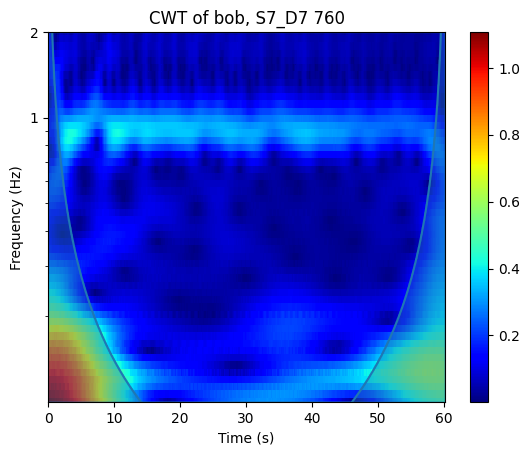

S7_D8 760


In [ ]:
for subject_idx, subject_number in enumerate(['1', '2']):
    cwt_key = f"cwt{subject_number}"
    subject_label_key = f"label_s{subject_number}"
    shown = []
    for wtc in dyad.wtcs:
        cwt = getattr(wtc, cwt_key)
        subject_label = getattr(wtc, subject_label_key)
        if cwt.label in shown:
            continue
        shown.append(cwt.label)
        print(cwt.label)
        _ = cwt.plot(title=f"CWT of {subject_label}, {cwt.label}")
        plt.show()
